# South African Language Identification Hack 2022

© Explore Data Science Academy

---
### Honour Code

I **Joshua, Olalemi**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Hackathon Overview:

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government
<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F7f34544c1b1f61d1a5949bddacfd84a9%2FSouth_Africa_languages_2011.jpg?generation=1604393669339034&alt=media"
     alt="South Africa's Languages"
     style="float: center; padding-bottom=0.5em"
     width=800px/>


With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Submission File</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, I imported and briefly discussed the libraries that I used throughout the analysis and modelling. |

---

In [1]:
#Come back and regroup the imports accordingly
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd #This will be used for data loading and manipulation
import numpy as np # This will be used for linear algebra on data
import seaborn as sns 
import matplotlib.pyplot as plt #This will be used for data visualization
from matplotlib import rc
%matplotlib inline


# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180 # Quality of all figures in notebook

# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from os import path
from PIL import Image

# ML Libraries
from sklearn.model_selection import train_test_split
from nltk import pos_tag

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


# Import vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



import warnings
warnings.filterwarnings('ignore')

from nlppreprocess import NLP

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, I loaded the "train" and "test" datasets into different DataFrames. |

---

In [2]:
df_train = pd.read_csv("train_set.csv") # load the train data

df_test = pd.read_csv("test_set.csv") # load the  test data

In [3]:
#load the sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, I performed an in-depth analysis of all the variables in the DataFrame.|

---


In [4]:
sample_submission #This is to have an overview of the submission data

,index,lang_id
0,1,tsn
1,2,nbl


As seen in the result above, we are expected to submit a csv file with two (2) columns: "index" and "lang_id"

In [5]:
df_train #This is to have an overview of the trains data.

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...


Looking at the top five and bottom five rows of our data we can see some of our features as well as the types of data we are working with.

It is observed that it contains 2 columns: "lang_id" & "text".
The "lang_id" is the language class the text belongs to; while the "text" column contains the actual text in a South African language.


Let's also have an overview of the test data below.


In [6]:
df_test #This is to have an overview of the trains data.

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
...,...,...
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."


From the above result, it can be seen that though the test data also has two(2) columns ("index" & "text"), it doesn't contain the "lang_id" column (like the train dataset). This is normal because that is what we want to get in this hackathon.

Therefore, our focus will be on the trains dataset.

And to proceed further with the exploration of the data, since we know that null values and non-numerical data types (called "object") affect Machine Learning (ML) models, let's check if any of these are present in the train data.

In [7]:
#This will print the total null values in the dataset and the data types of the data in the columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


Well, fortunately for us, it appears that there are no null values in the data (strange but true). But there is a big "BUT" here. The data type of the contents in the dataset is "object" (texts.). Let's not worry about that for now; it will be dealt with later.

As an *Explorer*, let's keep exploring 😄.



The next thing we want to explore is the unique languages and their number. This will help us know if `resamplign` will need to be done.

In [8]:
#This will return a list of the unique texts in the lang_id column and the number of times they appeared

print('The total number of unique entries in lang_id columns is:', len(df_train['lang_id'].unique()), "which are seen below:")
df_train['lang_id'].value_counts()

The total number of unique entries in lang_id columns is: 11 which are seen below:


xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

Wow, I'm shocked right now! It appears that there are 11 unique entries and they are all balanced. Let me visualize this on a plot.

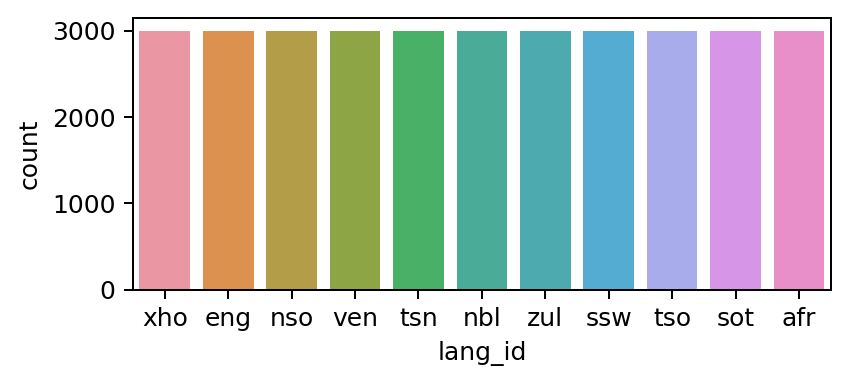

In [9]:
#using seaborn's countplot function
fig, axis = plt.subplots(figsize=(5, 2))
axis = sns.countplot(x='lang_id', data=df_train)
plt.show()

Strange but true, the data is evenly distributed across.

Therefore, without much ado, let's now proceed to engineer the data.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, I engineered the dataset by cleaning it (removing the noise) and also adding new features - as identified in the EDA phase. |

---

In [10]:
#Let's first create an insurance train data, just to be on the safe side
train_insurance = df_train.copy()

### Remove URLs


In [11]:
#Remove urls in the text and replaces with 'url-web'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_insurance['text'] = train_insurance['text'].replace(to_replace = pattern_url,
                                                                value = subs_url,
                                                                regex = True)

#Let's see an overview of the train_insurance
train_insurance.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [12]:
#Makes all the text lower case
train_insurance['text'] = train_insurance['text'].str.lower()

### Remove Punctuations
Now let's remove the punctuation using the `string` import.

First, create a function to do that...

In [13]:
def remove_punctuation(text):
    '''
    This function takes in a text, and returns the text without puntuation marks
    '''
    return ''.join([chars for chars in text if chars not in string.punctuation])

...Then apply the created function to the text column

In [14]:
train_insurance['text'] = train_insurance['text'].apply(remove_punctuation)

Cool. Let's check a random text just to be sure.

In [15]:
train_insurance['text'].iloc[234]

'mokgwa wa moralo wa mafapha a mmuso o radilweng hantle le o qobellwang o tla fana ka tshusumetso e kgolwanyane meralong e kopantsweng ya ntshetsopele mabapi le moralo oo mahlakore a mang a mmuso ho kenyeleditswe dikarolo tsa mafapha a sebedisang ditjhelete tsa bona ka teng kahare ho bomasepala'

As seen above, apparently, the function did it's job well.

### Stop Words 
Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.

The function below removes all of the English stopwords from the input text using the Natural Language Processing (NLP) package.

In [16]:
def remove_stop_words(text):

   '''
   The function takes in a text and returns the text without stopwords
   Simply put: it removes stop words from a text
   ''' 
   text_cleaner = NLP(replace_words=True,
                     remove_numbers=True,
                     remove_stopwords=True,
                     remove_punctuations=True)
   text = text_cleaner.process(text)
   return text

Now that we have the function, let's apply it to the text column in the data and create a new column "clean_text" for it.

In [17]:
train_insurance['clean_text'] = train_insurance['text'].apply(lambda x: remove_stop_words(x))

Now that we have applied the function that removes all the stop words, let preview a random cell in the data now.

In [18]:
#You can rerun this cell to view random cells
train_insurance['clean_text'].sample()

2374    ukuphatha okuhle kutjho ukuthi minengi imithom...
Name: clean_text, dtype: object

We are done with the cleaning of the data. However, recall that all the cleaning was done on the "insurance" data we created above. So, let's combine all the functions we used to clean the insurance dataset and apply it on the real train and test data.

In [19]:
#Remove urls in the text and replaces with 'url-web'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['text'] = df_train['text'].replace(to_replace = pattern_url,
                                                                value = subs_url,
                                                                regex = True)

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test['text'] = df_test['text'].replace(to_replace = pattern_url,
                                                                value = subs_url,
                                                                regex = True)


In [20]:
#Makes all the text lower case
df_train['cleaned_text'] = df_train['text'].str.lower()

df_test['cleaned_text'] = df_test['text'].str.lower()

In [21]:
#Removes punctuations
df_train['cleaned_text'] = df_train['text'].apply(remove_punctuation)

df_test['cleaned_text'] = df_test['text'].apply(remove_punctuation)

In [22]:
#Removes stopwords
df_train['cleaned_text'] = df_train['text'].apply(lambda x: remove_stop_words(x))

df_test['cleaned_text'] = df_test['text'].apply(lambda x: remove_stop_words(x))

Here is a glance of the cleaned datasets

In [23]:
#Prints out the first and last 5 rows of the train data
df_train

,lang_id,text,cleaned_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,province kwazulu natal department transport in...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...,closing date submission completed tenders augu...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,nawuphina umntu ofunyenwe enetyala phantsi kwa...


In [24]:
#Prints out the first and last 5 rows of the test data
df_test

,index,text,cleaned_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo kgethegileng letlelela kga...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta
...,...,...,...
5677,5678,You mark your ballot in private.,You mark your ballot in private
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...,Ge o ka kgetha ka bowena go se omi e Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ...",E Ka kopo etsa kgetho ya hao ka hloko hobane ...
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ...",TB ke bokudi ba PMB mme Morero o tla lefella ...


### Feature Engineering
Now that we have cleaned the datasets, the next for us to do is to split into dependent and target variables. The convention is to assign "X" as the dependent varaible and "y" as the target variable.

In [25]:
#Assigns X to the 'cleaned_text' column
X = df_train['cleaned_text']

#assigns y to the 'lang_id' column
y = df_train['lang_id']

With all these, we have come to the end of the Data Engineering section.

Let's begin to build our ML models.

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, I created several Machine Learning (ML) models to classify the languages accordingly. |

---

### `Train_Test_Split`

As the custom is, we will start building our models by first splitting the train data usinng sklearn's train_test_split.

In [26]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

In the next two cells, we will define the model names and call the model implementation classes.

In [27]:
names = ['Logistic Regression',
         'MultinomialNB', 
         'RidgeClassifier',          
         'SDGClassifier',
         'LinearSVC'
         ]

In [28]:
models = [LogisticRegression(random_state =42 , max_iter=20000) , 
       MultinomialNB(),
       RidgeClassifier(random_state=42), 
       SGDClassifier(random_state=42),
       LinearSVC(random_state=42)]

In [29]:
def assesment(*args , **kwargs):
  model_stats = {}
  for name, clf in zip(names, models):
    print ('Fitting {:s} model...'.format(name))
    #clf.fit(X_train, y_train)
    model = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 3), analyzer= 'char')),
                      ('clf' , clf)
                      ])

    run_time = %timeit -q -o model.fit(X_train, y_train) #Training

    print ('... predicting')
    model_pred = model.predict(X_test) #Testing

    # Dictionary of Models Performances
    print ('... scoring')
    model_stats[clf.__class__.__name__] = {
        'F1-Macro':metrics.f1_score(y_test, model_pred, average='macro'),
        'F1-Accuracy':metrics.f1_score(y_test, model_pred, average='micro'),
        'F1-Weighted':metrics.f1_score(y_test, model_pred, average='weighted')}
    print('... done!')
  print('All Done!!!')
  return pd.DataFrame.from_dict(model_stats, orient='index')


That's all done! Now let's take a look at the results.

In [30]:
performance = assesment(models , X_train , X_test , y_train , y_test)
performance.to_csv('performance.csv')
dataframe = pd.read_csv('performance.csv', index_col = 0)

Fitting Logistic Regression model...
... predicting
... scoring
... done!
Fitting MultinomialNB model...
... predicting
... scoring
... done!
Fitting RidgeClassifier model...
... predicting
... scoring
... done!
Fitting SDGClassifier model...
... predicting
... scoring
... done!
Fitting LinearSVC model...
... predicting
... scoring
... done!
All Done!!!


In [31]:
dataframe.sort_values('F1-Weighted', ascending=False)

,F1-Macro,F1-Accuracy,F1-Weighted
LinearSVC,0.997575,0.997576,0.997575
SGDClassifier,0.997423,0.997424,0.997423
RidgeClassifier,0.997122,0.997121,0.997122
MultinomialNB,0.996970,0.996970,0.996970
LogisticRegression,0.996062,0.996061,0.996062


Too many numbers to comprehend. Let's use a plot to better visualize the performances of the models.

From the table of values above, we can see that the LogisticRegression model performed best.

## Hyperparameter Tuning

A hyperparameter is a variable or argument whose value is set before the training process begins. Different model training algorithms require different hyperparameters, and some simple algorithms require none.

**Hyperparameter optimization**, or tuning, is the method of choosing a set of optimal hyperparameters for a learning algorithm.

The same type of machine learning model can require different constraints, weights or learning rates to generalize to different data patterns. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given data.

Various techniques exists for tuning hyperparameters, however, let's use the **GridSearch** technique.

First off, let's create a function "parameters_tuning" that non-key word argument and key word argument and returns the best among them all.

In [32]:
def parameters_tuning(*args , **kwargs):
  best_parameter = {}

  for name, clf in zip(names, models):
    print('Fitting {:s} model...'.format(name))
    model = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')),
                      ('clf' , clf)])
    run_time = %timeit -q -o model.fit(X_train, y_train) #Training
    
    #Get models performing parameters
    print('...getting parameters')
    parameter = model.get_params()
    model_name = clf.__class__.__name__ 
    model_name = {}
    for key in parameter:
      if key.startswith("clf"):
        if len(key) < 5:
          model_name['model'] = parameter[key]
        else:
            model_name[key[5:]] = parameter[key]
    best_parameter[clf.__class__.__name__] = model_name
  print('...All done')
  return best_parameter

In [33]:
best_parameter = parameters_tuning(models, X_train, y_train)

Fitting Logistic Regression model...
...getting parameters
Fitting MultinomialNB model...
...getting parameters
Fitting RidgeClassifier model...
...getting parameters
Fitting SDGClassifier model...
...getting parameters
Fitting LinearSVC model...
...getting parameters
...All done


Let's take a view of the best performing parameters

In [34]:
#Prints out the  
best_parameter

{'LogisticRegression': {'model': LogisticRegression(max_iter=20000, random_state=42),
  'C': 1.0,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 20000,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': 42,
  'solver': 'lbfgs',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 'MultinomialNB': {'model': MultinomialNB(),
  'alpha': 1.0,
  'class_prior': None,
  'fit_prior': True},
 'RidgeClassifier': {'model': RidgeClassifier(random_state=42),
  'alpha': 1.0,
  'class_weight': None,
  'copy_X': True,
  'fit_intercept': True,
  'max_iter': None,
  'normalize': 'deprecated',
  'positive': False,
  'random_state': 42,
  'solver': 'auto',
  'tol': 0.001},
 'SGDClassifier': {'model': SGDClassifier(random_state=42),
  'alpha': 0.0001,
  'average': False,
  'class_weight': None,
  'early_stopping': False,
  'epsilon': 0.1,
  'eta0': 0.0,
  'fit_intercept': True,
  'l1_ratio': 0.1

From the result above, it can be seen that the two best models are `MultinomialNB()` and `RidgeClassifier` (for reference sake, we will refer to the 'MultinomialNB' and 'RidgeClassifier' models as 'model_multi' and 'model_ridge' respectively). 
So, let's focus more on these and see how we can fine-tune the parameters by running a `GridSearch` through the best parameters.

### GridSearch

In [35]:
#An instance for the MultinomialNB base model
model_multi = MultinomialNB()

#An instance for the RidgeClassifier base model
model_ridge = RidgeClassifier()

#### MultinomialNB() Model

Next, we will apply the TfidVectorizer and StratifiedKFold with hyperparameters within the range of the best performing hyperparameters.

In [36]:
Vectorize = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')
X_train = Vectorize.fit_transform(X_train)
X_test = Vectorize.transform(X_test)

In [37]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True,
                                   random_state=42)

In [38]:
best_parameter[models[1].__class__.__name__]

{'model': MultinomialNB(),
 'alpha': 1.0,
 'class_prior': None,
 'fit_prior': True}

In [39]:
alpha = list(np.linspace(0.1,0.02,4))
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(estimator= model_multi,
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=stratified_kfold,
                           error_score=0,
                           n_jobs=-1)

In [40]:
grid_search.fit(X_train, y_train)
prediction = grid_search.predict(X_test)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

In [41]:
print(f'Cross-validation score: {cv_score}')
print(f'Test score: {test_score}')
grid_search.best_params_    
grid_search.best_estimator_

Cross-validation score: 0.9998106058551002
Test score: 0.999242423506417


MultinomialNB(alpha=0.1)

#### RidgeClassifier Model

In [42]:
best_parameter[models[2].__class__.__name__]

{'model': RidgeClassifier(random_state=42),
 'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': 42,
 'solver': 'auto',
 'tol': 0.001}

In [43]:
alpha = list(np.linspace(0.15,0.4, 5))
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(estimator= model_ridge,
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=stratified_kfold,
                           error_score=0,
                           n_jobs=-1)

In [44]:
grid_search.fit(X_train, y_train)
prediction = grid_search.predict(X_test)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

In [45]:
print(f'Cross-validation score: {cv_score}')
print(f'Test score: {test_score}')
grid_search.best_params_    
grid_search.best_estimator_

Cross-validation score: 0.9993560583467664
Test score: 0.9989391401513372


RidgeClassifier(alpha=0.275)

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X, y,  stratify=y,
                                                        test_size=0.3,
                                                        random_state =1)

In [47]:
vect = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(2, 6), analyzer= 'char')
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [48]:
multiNB1 = MultinomialNB(alpha=0.1)
multiNB2 = MultinomialNB(alpha=0.1)

estimators = [('multiNB1', multiNB1), ('multiNB2', multiNB2)]
final_est = RidgeClassifier(alpha=0.2125)

In [49]:
stacking_NB2 = StackingClassifier(estimators = estimators,
                           final_estimator = final_est,
                           passthrough = True)


In [50]:
stacking_NB2.fit(X_train , y_train)

StackingClassifier(estimators=[('multiNB1', MultinomialNB(alpha=0.1)),
                               ('multiNB2', MultinomialNB(alpha=0.1))],
                   final_estimator=RidgeClassifier(alpha=0.2125),
                   passthrough=True)

In [51]:
pred = stacking_NB2.predict(X_test)

In [52]:
model_stats = {}
model_stats[stacking_NB2.__class__.__name__] = {
        'F1-Macro':metrics.f1_score(y_test, pred, average='macro'),
        'F1-Accuracy':metrics.f1_score(y_test, pred, average='micro'),
        'F1-Weighted':metrics.f1_score(y_test, pred, average='weighted')}
pd.DataFrame.from_dict(model_stats, orient='index')

,F1-Macro,F1-Accuracy,F1-Weighted
StackingClassifier,0.999798,0.999798,0.999798


In [53]:
count_vec = CountVectorizer(ngram_range=(3,7), analyzer= 'char')
X_train , X_test , y_train , y_test = train_test_split(X, y, stratify=y,test_size=0.05, random_state =1)
X_train = count_vec.fit_transform(X_train)
X_test = count_vec.transform(X_test)

In [54]:
multiNB1 = MultinomialNB(alpha=0.1)
multiNB2 = MultinomialNB(alpha=0.1)
multiNB3 = MultinomialNB(alpha=0.1)

estimators = [('multiNB1', multiNB1), ('multiNB2', multiNB2), ('multiNB3', multiNB3)]
final_est = RidgeClassifier(alpha=0.125)

In [55]:
stacking_NB3 = StackingClassifier(estimators = estimators,
                                   final_estimator = final_est,
                                   passthrough = True)

In [56]:
stacking_NB3.fit(X_train , y_train)

StackingClassifier(estimators=[('multiNB1', MultinomialNB(alpha=0.1)),
                               ('multiNB2', MultinomialNB(alpha=0.1)),
                               ('multiNB3', MultinomialNB(alpha=0.1))],
                   final_estimator=RidgeClassifier(alpha=0.125),
                   passthrough=True)

In [57]:
pred = stacking_NB3.predict(X_test)

In [58]:
model_stats = {}
model_stats[stacking_NB3.__class__.__name__] = {
        'F1-Macro':metrics.f1_score(y_test, pred, average='macro'),
        'F1-Accuracy':metrics.f1_score(y_test, pred, average='micro'),
        'F1-Weighted':metrics.f1_score(y_test, pred, average='weighted')}
pd.DataFrame.from_dict(model_stats, orient='index')

,F1-Macro,F1-Accuracy,F1-Weighted
StackingClassifier,1.0,1.0,1.0


<a id="six"></a>
## 6. Submission File
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section, I created the submission file that will be used for submission on Kaggle. |

---

In [62]:
X = df_test['cleaned_text']
Vectorize = vect.transform(X)

In [63]:
df_test['lang_id'] = stacking_NB2.predict(Vectorize)

In [65]:
submission = df_test[['index', 'lang_id']]
submission.to_csv('Submission.csv',index=False)
submission

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot
